## Parkinsons Disease Detection


#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
- To classify if Parkinsons Disease is present or not based on patients' constraints


### 2) Data Collection
- Dataset Source - Physionet.org
- The dataset consists of 469 patients' data
- Has 3 types of data - Patients', Questionnaires, Movements

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warnings Library.

In [3]:
pip install numpy pandas seaborn

Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [148]:
df = pd.read_csv('../Dataset/patients_questions_data.csv')

#### Show Top 5 Records

In [149]:
df.head()

,id,disease_comment,age_at_diagnosis,age,height,weight,gender,handedness,appearance_in_kinship,appearance_in_first_grade_kinship,...,Falling,"Finding it difficult to stay awake during activities such as working, driving or eating",Difficulty getting to sleep at night or staying asleep at night,"Intense, vivid dreams or frightening dreams",Talking or moving about in your sleep as if you are acting out a dream,"Unpleasant sensations in your legs at night or while resting, and a feeling that you need to move",Swelling of your legs,Excessive sweating,Double vision,Believing things are happening to you that other people say are not true
0,1,-,56,56,173,78,male,right,True,True,...,False,False,False,False,False,False,False,False,False,False
1,2,Left-Sided resting tremor and hypokinesia with...,69,81,193,104,male,right,False,NaN,...,True,True,True,False,True,False,True,False,True,False
2,3,-,45,45,170,78,female,right,False,NaN,...,False,False,False,False,False,False,False,False,False,False
3,4,IPS akinetic-rigid type,63,67,161,90,female,right,False,NaN,...,True,True,True,False,False,True,True,True,False,False
4,5,IPS tremordominant type,65,75,172,86,male,left,False,NaN,...,False,True,True,True,True,True,True,False,False,False


#### Shape of the dataset

In [150]:
df.shape

(469, 42)

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check & Fill Missing values

In [151]:
df.isna().sum()

id                                                                                                     0
disease_comment                                                                                        0
age_at_diagnosis                                                                                       0
age                                                                                                    0
height                                                                                                 0
weight                                                                                                 0
gender                                                                                                 0
handedness                                                                                             0
appearance_in_kinship                                                                                  0
appearance_in_first_grade_kinship                      

#### The missing values for each column is given

In [102]:
'''missing_values = df.isnull().sum()
columns_with_missing_values = missing_values[missing_values > 1].index.tolist()

for column in df.columns:
    if column in columns_with_missing_values:
        # Filling categorical columns with the mode
        if df[column].dtype == 'object':
            df[column].fillna(df[column].mode()[0], inplace=True)
        # Filling numerical columns with the mean
        else:
            df[column].fillna(df[column].mean(), inplace=True)'''


In [152]:
df.isna().sum()

id                                                                                                     0
disease_comment                                                                                        0
age_at_diagnosis                                                                                       0
age                                                                                                    0
height                                                                                                 0
weight                                                                                                 0
gender                                                                                                 0
handedness                                                                                             0
appearance_in_kinship                                                                                  0
appearance_in_first_grade_kinship                      

#### No missing values anymore

### 3.2 Check Duplicates

In [153]:
df.duplicated().sum()

0

#### There are no duplicates  values in the data set

### 3.3 Check data types

In [154]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469 entries, 0 to 468
Data columns (total 42 columns):
 #   Column                                                                                             Non-Null Count  Dtype 
---  ------                                                                                             --------------  ----- 
 0   id                                                                                                 469 non-null    int64 
 1   disease_comment                                                                                    469 non-null    object
 2   age_at_diagnosis                                                                                   469 non-null    int64 
 3   age                                                                                                469 non-null    int64 
 4   height                                                                                             469 non-null    int64 
 5   w

### 3.4 Checking the number of unique values of each column

In [155]:
df.nunique()

id                                                                                                   469
disease_comment                                                                                      140
age_at_diagnosis                                                                                      65
age                                                                                                   48
height                                                                                                49
weight                                                                                                77
gender                                                                                                 2
handedness                                                                                             2
appearance_in_kinship                                                                                  2
appearance_in_first_grade_kinship                      

### 3.5 Converting Categorical Labels as Numeric Labels

In [156]:
import pandas as pd

# Load your dataset
df = pd.read_csv('../Dataset/patients_questions_data.csv')  # Replace with actual file path

# Identify boolean columns (dtype == 'bool')
boolean_columns = df.select_dtypes(include=['bool']).columns

# Convert only boolean columns to 0 (False) and 1 (True)
df[boolean_columns] = df[boolean_columns].astype(int)

print(df.head())


   id                                    disease_comment  age_at_diagnosis  \
0   1                                                  -                56   
1   2  Left-Sided resting tremor and hypokinesia with...                69   
2   3                                                  -                45   
3   4                            IPS akinetic-rigid type                63   
4   5                            IPS tremordominant type                65   

   age  height  weight  gender handedness  appearance_in_kinship  \
0   56     173      78    male      right                      1   
1   81     193     104    male      right                      0   
2   45     170      78  female      right                      0   
3   67     161      90  female      right                      0   
4   75     172      86    male       left                      0   

  appearance_in_first_grade_kinship  ... Falling  \
0                              True  ...       0   
1                 

### 3.6 Check statistics of data set

In [157]:
df.describe()

,id,age_at_diagnosis,age,height,weight,appearance_in_kinship,label,Dribbling of saliva during the daytime,Loss or change in your ability to taste or smell,Difficulty swallowing food or drink or problems with choking,...,Falling,"Finding it difficult to stay awake during activities such as working, driving or eating",Difficulty getting to sleep at night or staying asleep at night,"Intense, vivid dreams or frightening dreams",Talking or moving about in your sleep as if you are acting out a dream,"Unpleasant sensations in your legs at night or while resting, and a feeling that you need to move",Swelling of your legs,Excessive sweating,Double vision,Believing things are happening to you that other people say are not true
count,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,...,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.00000
mean,235.000000,55.275053,64.240938,174.181237,81.899787,0.268657,1.074627,0.285714,0.343284,0.302772,...,0.226013,0.196162,0.460554,0.251599,0.326226,0.309168,0.292111,0.281450,0.119403,0.06823
std,135.532899,17.105225,10.698847,10.921397,17.916252,0.443734,0.637818,0.452236,0.475312,0.459948,...,0.418694,0.397517,0.498974,0.434395,0.469332,0.462644,0.455219,0.450187,0.324608,0.25241
min,1.000000,0.000000,40.000000,55.000000,45.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,118.000000,48.000000,56.000000,168.000000,69.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,235.000000,58.000000,65.000000,175.000000,81.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,352.000000,67.000000,72.000000,181.000000,92.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.00000
max,469.000000,90.000000,90.000000,203.000000,181.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


## Numerical Data Analysis

In [158]:
numerical_cols = df.select_dtypes(include='number').columns
top_5_numerical_cols = numerical_cols[:6]  # Get the first 5 columns
print(df[top_5_numerical_cols].describe())


               id  age_at_diagnosis         age      height      weight  \
count  469.000000        469.000000  469.000000  469.000000  469.000000   
mean   235.000000         55.275053   64.240938  174.181237   81.899787   
std    135.532899         17.105225   10.698847   10.921397   17.916252   
min      1.000000          0.000000   40.000000   55.000000   45.000000   
25%    118.000000         48.000000   56.000000  168.000000   69.000000   
50%    235.000000         58.000000   65.000000  175.000000   81.000000   
75%    352.000000         67.000000   72.000000  181.000000   92.000000   
max    469.000000         90.000000   90.000000  203.000000  181.000000   

       appearance_in_kinship  
count             469.000000  
mean                0.268657  
std                 0.443734  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 1.000000  
max                 1.000000  


## Questionnaire True %

In [159]:
numerical_cols = df.select_dtypes(include='number').columns
top_5_numerical_cols = numerical_cols[7:]
mean_values = df[top_5_numerical_cols].mean()  # Calculate mean for each column
print(mean_values * 100)


Dribbling of saliva during the daytime                                                               28.571429
Loss or change in your ability to taste or smell                                                     34.328358
Difficulty swallowing food or drink or problems with choking                                         30.277186
Vomiting or feelings of sickness (nausea)                                                            12.153518
Constipation (less than 3 bowel movements a week) or having to strain to pass a stool (faeces)       35.181237
Bowel (fecal) incontinence                                                                            4.904051
Feeling that your bowel emptying is incomplete after having been to the toilet                       24.733475
A sense of urgency to pass urine makes you rush to the toilet                                        55.437100
Getting up regularly at night to pass urine                                                          58.208955
U

In [160]:
binary_cols = df.select_dtypes(include='object').columns
binary_cols = [col for col in binary_cols if df[col].nunique() >= 2]
print(df[binary_cols].describe())


       disease_comment gender handedness appearance_in_first_grade_kinship  \
count              469    469        469                               181   
unique             140      2          2                                 2   
top                  -   male      right                             False   
freq                94    281        437                                91   

       effect_of_alcohol_on_tremor  
count                          469  
unique                           4  
top                        Unknown  
freq                           228  


In [161]:
label_column = 'label'  # Replace with your actual label column name
value_counts = df[label_column].value_counts(normalize=True) * 100
print(value_counts)

label
1    58.848614
2    24.307036
0    16.844350
Name: proportion, dtype: float64


#### Insights
1. Age Distribution: Range is from 40 to 90 years & the average age is approximately 64.24 years, with a standard deviation of 10.7 years, indicating a moderately wide age distribution with mostly elderly people.
2. The average age at diagnosis is however 55.27
3. Around 60% of the patients are Male.
4. About 58.8% of the patients are suffering from Parkinsons disease
5. 24.3% of patients have some other differential disease
6. 16.8% of the patients are Healthy Controls

### 3.9 Data Cleaning and Scaling

In [162]:
df['gender'] = df['gender'].replace({'male': 0, 'female': 1})
df['handedness'] = df['handedness'].replace({'right': 0, 'left': 1})


In [163]:
df['effect_of_alcohol_on_tremor'] = df['effect_of_alcohol_on_tremor'].replace({'Unknown': 0, 'No effect': 1, 'Worsening': 2, 'Improvement': 3})

In [164]:
df.drop(columns=['disease_comment'], inplace=True)

The appearance_in_kinship has 288/469 NaN values which is quite high and challenging for Imputation

Lets first find its correlation with the label and see if its an important column

In [165]:
correlation = df[['appearance_in_first_grade_kinship', 'label']].corr().iloc[0, 1]
print("Correlation:", correlation)


Correlation: 0.22741687945015657


In [166]:
# Calculate correlation matrix
correlation_matrix = df.corr()
correlated_features = correlation_matrix['appearance_in_first_grade_kinship'].sort_values(ascending=False)
print(correlated_features)

appearance_in_first_grade_kinship                                                                    1.000000
appearance_in_kinship                                                                                0.753397
effect_of_alcohol_on_tremor                                                                          0.319219
label                                                                                                0.227417
height                                                                                               0.205251
Talking or moving about in your sleep as if you are acting out a dream                               0.134589
Getting up regularly at night to pass urine                                                          0.131750
A sense of urgency to pass urine makes you rush to the toilet                                        0.127506
weight                                                                                               0.125334
age_at_dia

We now need to Impute the missing values in appearance_in_first_grade_kinship

So the best way is to find the feature which has high correlation with it

We find it to be the appearance_in_kinship (75%)

Now we'll impute according to it!

In [168]:
# Impute missing values in 'appearance_in_first_grade_kinship' (row_1) with values from 'appearance_in_kinship' (row_2)
df['appearance_in_first_grade_kinship'].fillna(df['appearance_in_kinship'], inplace=True)

In [170]:
# Convert True to 1 and False to 0 in the specific column or row (e.g., column 'appearance_in_first_grade_kinship')
df['appearance_in_first_grade_kinship'] = df['appearance_in_first_grade_kinship'].astype(int)

### 3.8 Cleaned Data Check

In [171]:
df.head()

,id,age_at_diagnosis,age,height,weight,gender,handedness,appearance_in_kinship,appearance_in_first_grade_kinship,effect_of_alcohol_on_tremor,...,Falling,"Finding it difficult to stay awake during activities such as working, driving or eating",Difficulty getting to sleep at night or staying asleep at night,"Intense, vivid dreams or frightening dreams",Talking or moving about in your sleep as if you are acting out a dream,"Unpleasant sensations in your legs at night or while resting, and a feeling that you need to move",Swelling of your legs,Excessive sweating,Double vision,Believing things are happening to you that other people say are not true
0,1,56,56,173,78,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,69,81,193,104,0,0,0,0,1,...,1,1,1,0,1,0,1,0,1,0
2,3,45,45,170,78,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,63,67,161,90,1,0,0,0,1,...,1,1,1,0,0,1,1,1,0,0
4,5,65,75,172,86,0,1,0,0,0,...,0,1,1,1,1,1,1,0,0,0


In [172]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 41 numerical features : ['id', 'age_at_diagnosis', 'age', 'height', 'weight', 'gender', 'handedness', 'appearance_in_kinship', 'appearance_in_first_grade_kinship', 'effect_of_alcohol_on_tremor', 'label', 'Dribbling of saliva during the daytime', 'Loss or change in your ability to taste or smell', 'Difficulty swallowing food or drink or problems with choking', 'Vomiting or feelings of sickness (nausea)', 'Constipation (less than 3 bowel movements a week) or having to strain to pass a stool (faeces)', 'Bowel (fecal) incontinence', 'Feeling that your bowel emptying is incomplete after having been to the toilet', 'A sense of urgency to pass urine makes you rush to the toilet', 'Getting up regularly at night to pass urine', 'Unexplained pains (not due to known conditions such as arthritis)', 'Unexplained change in weight (not due to change in diet)', 'Problems remembering things that have happened recently or forgetting to do things', 'Loss of interest in what is happening around yo

In [173]:
print(f"Number of rows in the DataFrame: {df.shape[0]}")

Number of rows in the DataFrame: 469


In [174]:
# Exporting the Cleaned csv file
# Sort the DataFrame by the 'id' column
df_sorted = df.sort_values(by='id', ascending=True)
df.to_csv('../Dataset/cleaned_data.csv', index=False)

### 4. Exploring Data ( Visualization )

#### 4.1 LinePlots For All Features

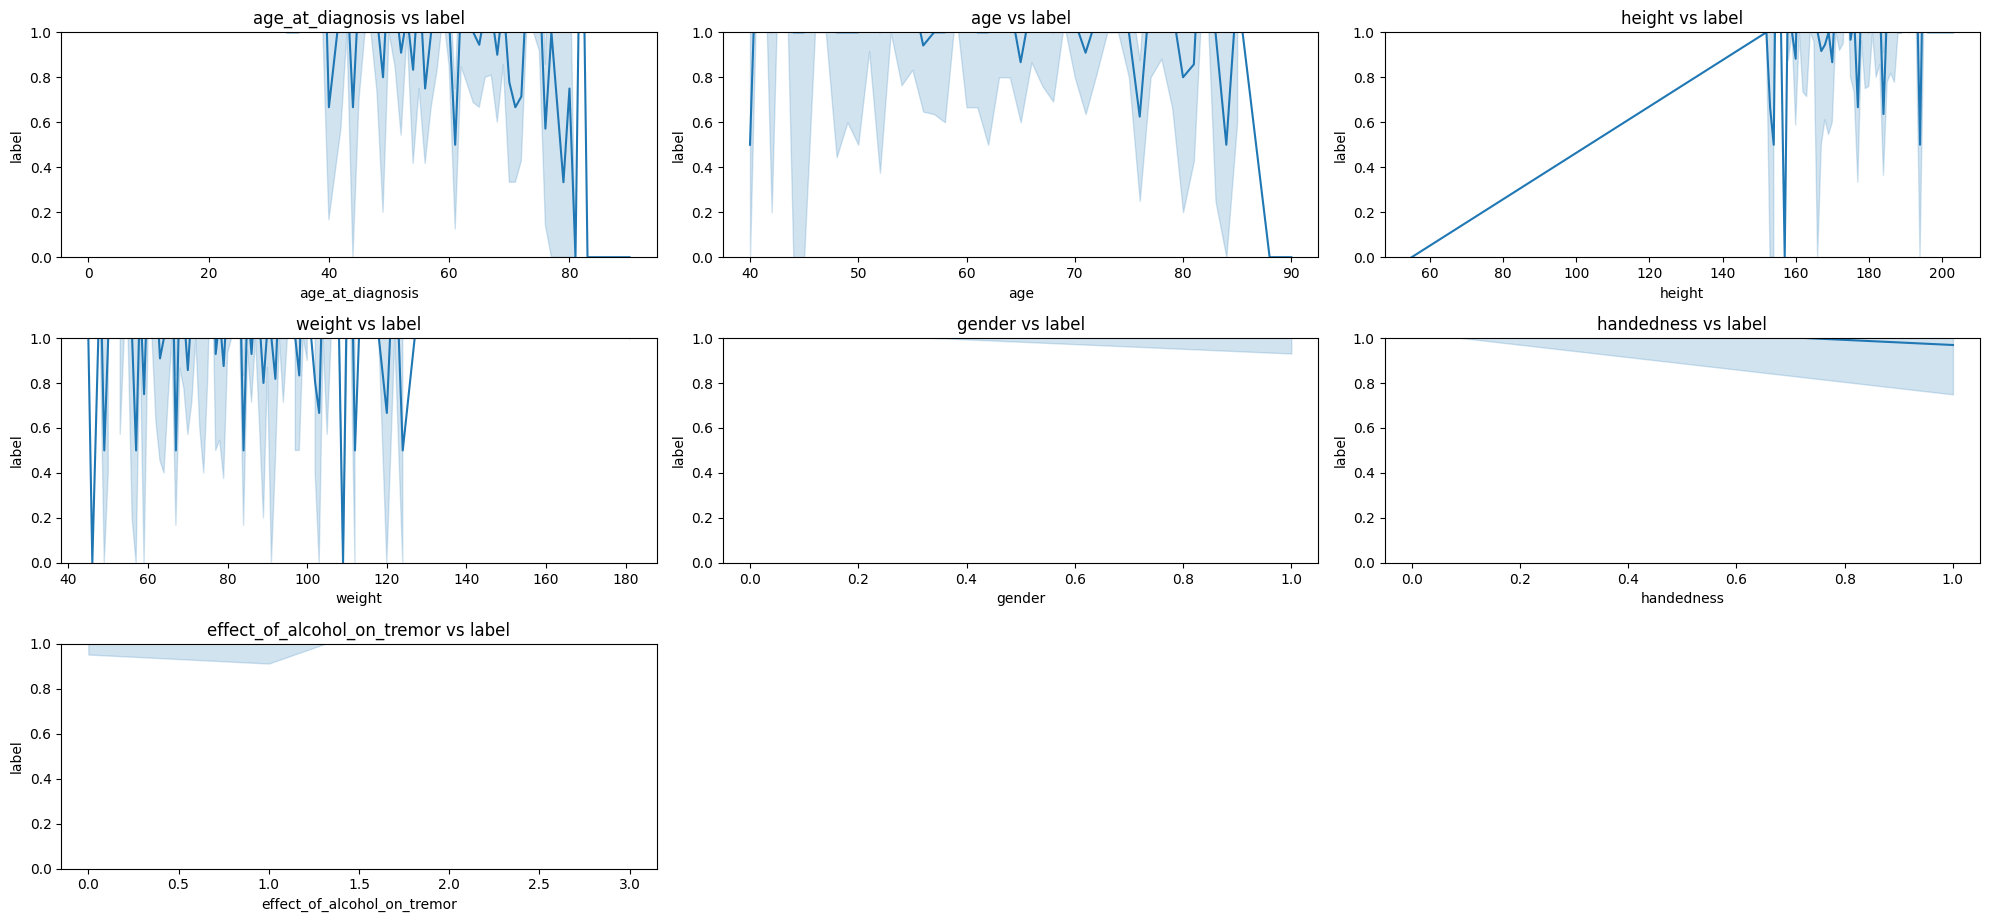

In [175]:
columns = df.select_dtypes(include=['float64', 'int64']).columns

# Exclude the first and last columns
columns = columns[1:-1]

plt.figure(figsize=(20, 15))
for i, col in enumerate(columns, 1):
    plt.subplot(5, 3, i)
    sns.lineplot(data=df, x=col, y='label')
    plt.ylim(0, 1)  # Set y-axis limits for Result
    plt.title(f'{col} vs label')

plt.tight_layout()
plt.show()

#### 4.2 Check distribution of questionnaire

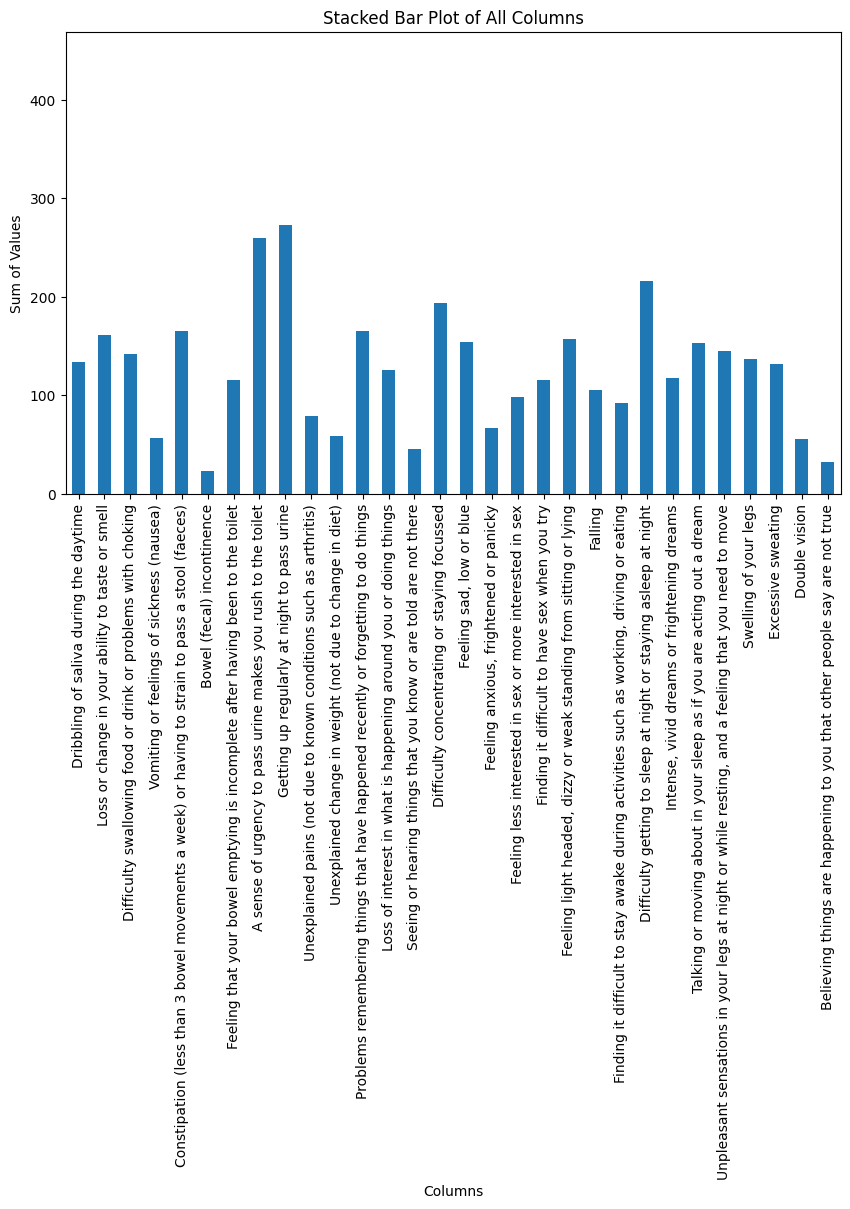

In [182]:
df[['Dribbling of saliva during the daytime', 'Loss or change in your ability to taste or smell', 'Difficulty swallowing food or drink or problems with choking', 'Vomiting or feelings of sickness (nausea)', 'Constipation (less than 3 bowel movements a week) or having to strain to pass a stool (faeces)', 'Bowel (fecal) incontinence', 'Feeling that your bowel emptying is incomplete after having been to the toilet', 'A sense of urgency to pass urine makes you rush to the toilet', 'Getting up regularly at night to pass urine', 'Unexplained pains (not due to known conditions such as arthritis)', 'Unexplained change in weight (not due to change in diet)', 'Problems remembering things that have happened recently or forgetting to do things', 'Loss of interest in what is happening around you or doing things', 'Seeing or hearing things that you know or are told are not there', 'Difficulty concentrating or staying focussed', 'Feeling sad, low or blue', 'Feeling anxious, frightened or panicky', 'Feeling less interested in sex or more interested in sex', 'Finding it difficult to have sex when you try', 'Feeling light headed, dizzy or weak standing from sitting or lying', 'Falling', 'Finding it difficult to stay awake during activities such as working, driving or eating', 'Difficulty getting to sleep at night or staying asleep at night', 'Intense, vivid dreams or frightening dreams', 'Talking or moving about in your sleep as if you are acting out a dream', 'Unpleasant sensations in your legs at night or while resting, and a feeling that you need to move', 'Swelling of your legs', 'Excessive sweating', 'Double vision', 'Believing things are happening to you that other people say are not true'
]].sum().plot(kind='bar', stacked=True, figsize=(10, 6))

# Set the y-axis limits
plt.ylim(0, 469)

# Set the labels and title
plt.xlabel('Columns')
plt.ylabel('Sum of Values')
plt.title('Stacked Bar Plot of All Columns')

# Display the plot
plt.show()

#### 4.3 CHECKING OUTLIERS

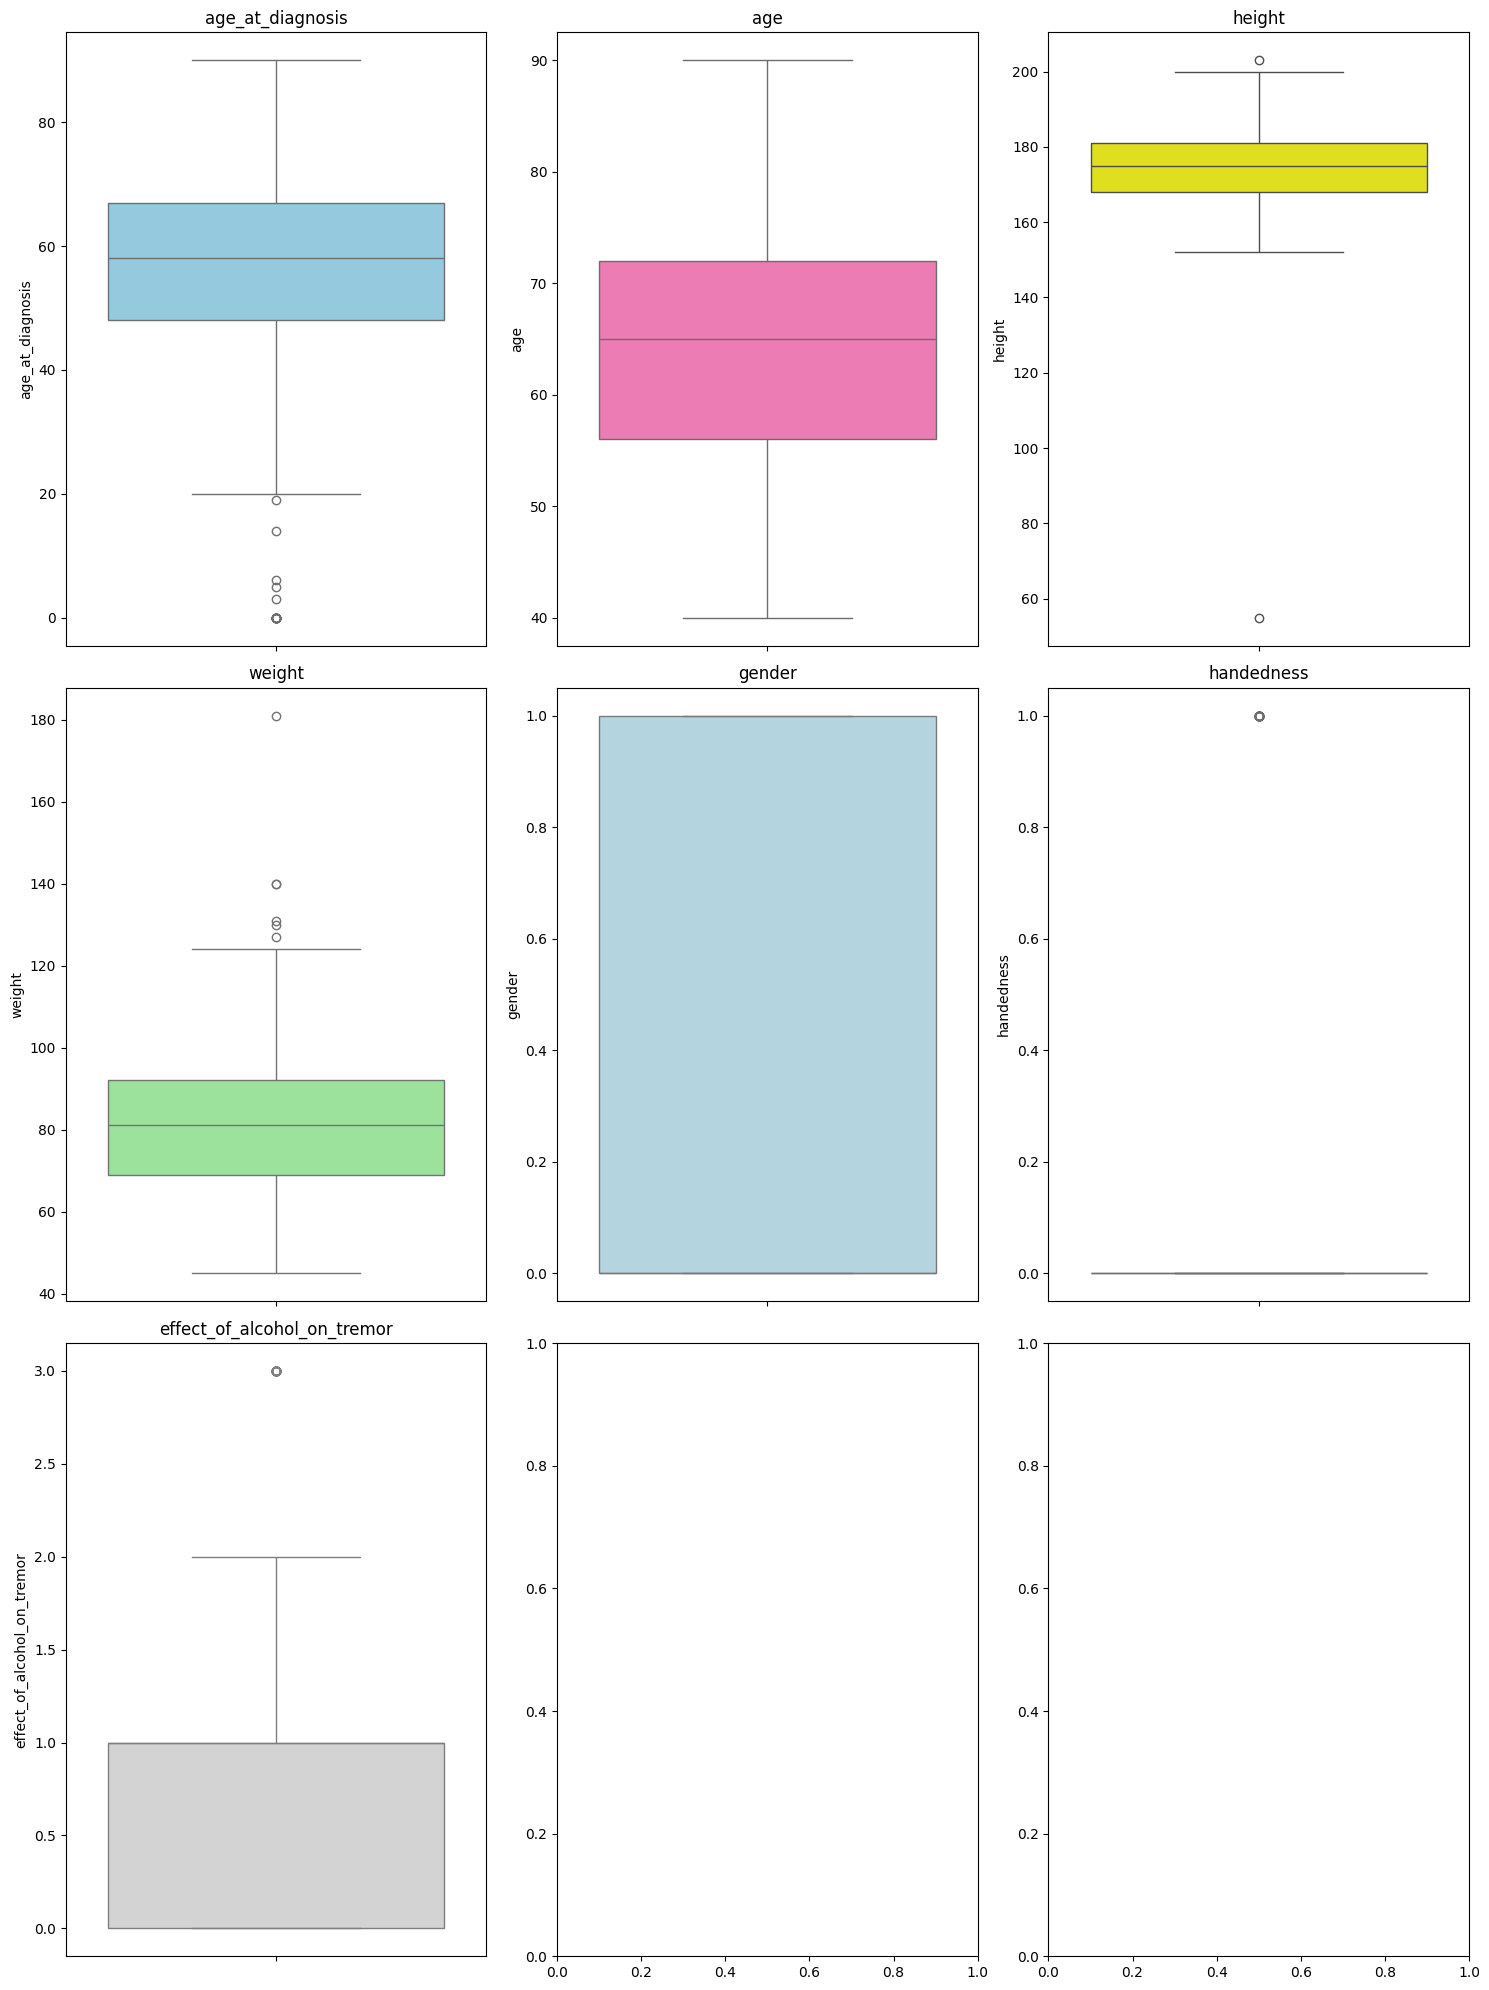

In [184]:
# Selecting all numerical columns, excluding the first and last
columns = df.select_dtypes(include=['float64', 'int64']).columns[1:-1]

# Create subplots with 5 rows and 3 columns
fig, axes = plt.subplots(3, 3, figsize=(15, 20))

# Define colors for each plot
colors = ['skyblue', 'hotpink', 'yellow', 'lightgreen', 'lightblue', 'lightcoral', 'lightgrey']

# Loop through each column and create a boxplot
for i, col in enumerate(columns):
    row, col_num = divmod(i, 3)
    sns.boxplot(y=df[col], ax=axes[row, col_num], color=colors[i % len(colors)])
    axes[row, col_num].set_title(col)

plt.tight_layout()
plt.show()

In [185]:
# Calculate quartiles and IQR
Q1 = df['weight'].quantile(0.25)
Q3 = df['weight'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['weight'] < lower_bound) | (df['weight'] > upper_bound)]

# Display the outliers
print("Outliers in weight levels:")
print(outliers['weight'])

Outliers in weight levels:
86     140
92     127
170    140
297    131
381    130
424    181
Name: weight, dtype: int64


In [192]:
# Calculate quartiles and IQR
Q1 = df['age_at_diagnosis'].quantile(0.25)
Q3 = df['age_at_diagnosis'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['age_at_diagnosis'] < lower_bound) | (df['age_at_diagnosis'] > upper_bound)]

# Display the outliers
print("Outliers in age_at_diagnosis levels:")
print(outliers['age_at_diagnosis'])

#VERIFIED!

Outliers in age_at_diagnosis levels:
Series([], Name: age_at_diagnosis, dtype: int64)


#### 4.4 Fixing Outliers

In [191]:
df.loc[df['age_at_diagnosis'] < 30, 'age_at_diagnosis'] = df['age']

#### 4.5 Correlation with Label

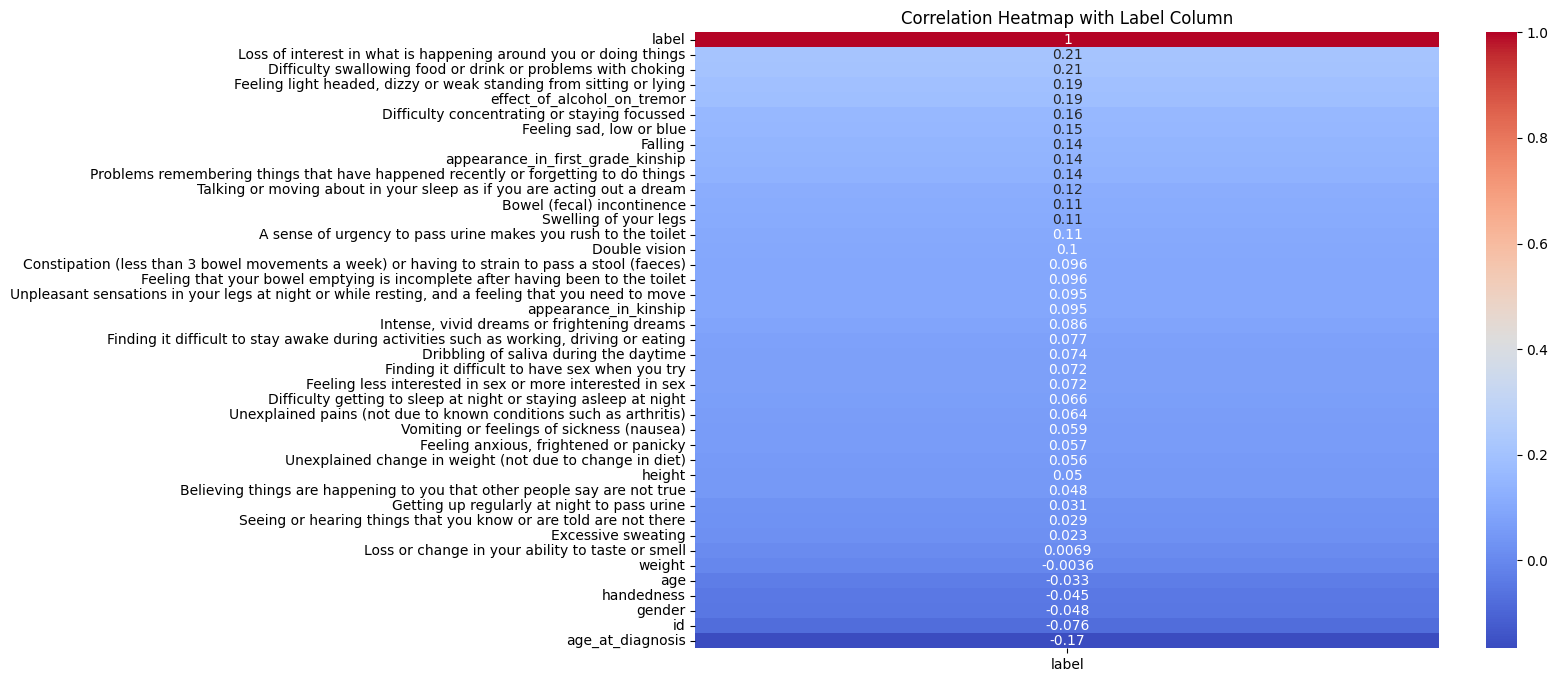

In [193]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix[['label']].sort_values(by='label', ascending=False), annot=True, cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap with Label Column')
plt.show()

age_at_diagnosis went from -0.31 to -0.17 just with that imputation

### 5. Conclusions
- There was a lot of data cleaning that had to be done with missing values correct and reasonable imputation
- The consistent scaling was performed by encoding
- Then there were outliers that had to be fixed
- Correlation was found to give some idea on each feature's correaltion with the label (Result)